In [ ]:
# Source 1: https://randerson112358.medium.com/classify-images-using-convolutional-neural-networks-python-a89cecc8c679
# Source 2: https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Cat03.jpg/640px-Cat03.jpg
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [ ]:
index = 0
x_train[index]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

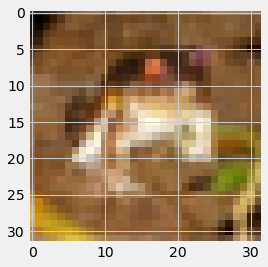

In [ ]:
img = plt.imshow(x_train[index])

In [ ]:
print('The image label is: ', y_train[index])

The image label is:  [6]


In [ ]:
classification = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('The image class is: ', classification[y_train[index][0]])

The image class is:  frog


In [ ]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [ ]:
print('The one hot label is:', y_train_one_hot[0])

The one hot label is: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(250, activation='relu'))
model.add(Dense(10, activation='softmax'))
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(250, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
hist = model.fit(x_train, y_train_one_hot, 
           batch_size=256, epochs=10, validation_split=0.2 )

Epoch 1/10
157/157 [==============================] - 105s 668ms/step - loss: 1.8316 - accuracy: 0.3135 - val_loss: 1.4755 - val_accuracy: 0.4571
Epoch 2/10
157/157 [==============================] - 82s 519ms/step - loss: 1.4218 - accuracy: 0.4843 - val_loss: 1.3116 - val_accuracy: 0.5295
Epoch 3/10
157/157 [==============================] - 80s 507ms/step - loss: 1.2561 - accuracy: 0.5470 - val_loss: 1.1348 - val_accuracy: 0.5948
Epoch 4/10
157/157 [==============================] - 81s 514ms/step - loss: 1.1295 - accuracy: 0.5995 - val_loss: 1.0934 - val_accuracy: 0.6107
Epoch 5/10
157/157 [==============================] - 79s 505ms/step - loss: 1.0203 - accuracy: 0.6405 - val_loss: 0.9728 - val_accuracy: 0.6562
Epoch 6/10
157/157 [==============================] - 79s 504ms/step - loss: 0.9375 - accuracy: 0.6754 - val_loss: 0.9372 - val_accuracy: 0.6718
Epoch 7/10
157/157 [==============================] - 80s 512ms/step - loss: 0.8670 - accuracy: 0.6944 - val_loss: 0.9163 - val_a

In [ ]:
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 8s 25ms/step - loss: 0.9110 - accuracy: 0.6905


0.690500020980835

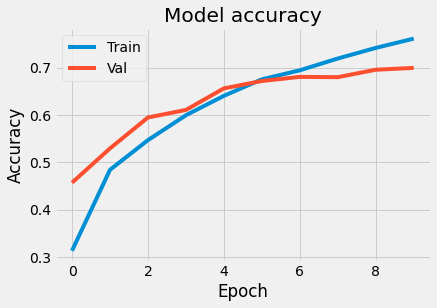

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

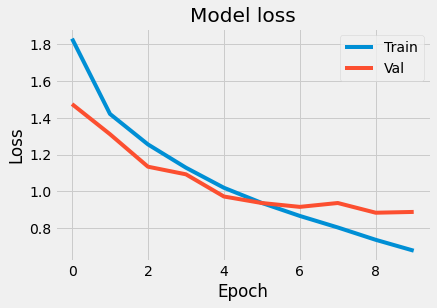

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()
new_image = plt.imread("cat.jpg")

Saving cat.4015.jpg to cat.4015.jpg


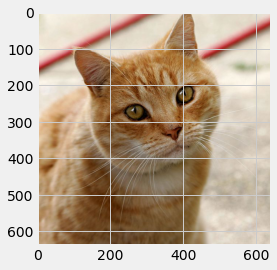

In [ ]:
img = plt.imshow(new_image)

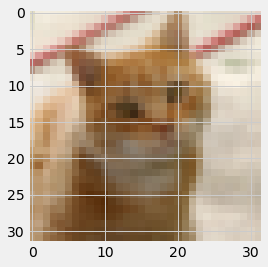

In [ ]:
from skimage.transform import resize
resized_image = resize(new_image, (32,32,3))
img = plt.imshow(resized_image)

In [ ]:
predictions = model.predict(np.array( [resized_image] ))

In [ ]:
predictions

array([[1.4132073e-03, 1.9389950e-04, 5.1372621e-02, 5.0843889e-01,
        3.0786982e-02, 3.0494443e-01, 7.6987736e-02, 2.3758691e-02,
        7.4211694e-04, 1.3614583e-03]], dtype=float32)

In [ ]:
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions
for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp
print(list_index)

[3, 5, 6, 2, 4, 7, 0, 9, 8, 1]


In [ ]:
i=0
for i in range(5):
  print(classification[list_index[i]], ':', round(predictions[0][list_index[i]] * 100, 2), '%')

cat : 50.84 %
dog : 30.49 %
frog : 7.7 %
bird : 5.14 %
deer : 3.08 %
